11912705黄松昊
SVM

# please read ReadMe file before testing


# DataSet: using data from both minist website and Class
# classifier: 0-9 classifier

# steps for svm

# 1. img data pre-process (Binarization,scale(0,1),align)
# 2. training svm model (4 models)
# 3. adjust param (cross validation * grid search)
# 4. testing & showing
# 5. performance on different SVM(with different kernels and regularization)



import packages

In [10]:
import gzip
import time
import numpy as np
from sklearn import preprocessing
import copy
from sklearn.svm import SVC
from sklearn.model_selection import  cross_val_score
import matplotlib.pyplot as plt

variations declaration

In [21]:
image_size  = 28

num_labels = 10

num_train = 2840

num_test = 900


functions used for pre-processing data

In [22]:
def show_pic(img):
    image = np.asarray(img).squeeze()
    plt.imshow(image,'gray')
    plt.show()


# Binarization one img function set valve to creating 0\1 data, two datasets to two ways
def Binarization(img_data,valve):
    img = copy.deepcopy(img_data)
    if valve == 230:
        for i in range(len(img)):
            if img[i] <= valve:
                img[i] = 0
            else:
                img[i] = 255
    elif valve == 0:
        for i in range(len(img)):
            if img[i] > valve:
                img[i] = 255
            else:
                img[i] = 0
    return img


# normalization,scale to (0,1)
#def scale(X_train,X_test):
    #min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
    #x_minmax_training = min_max_scaler.fit_transform(X_train)
    #x_minmax_testing = min_max_scaler.fit_transform(X_test)
    #return x_minmax_training,x_minmax_testing

# normalization,scale to (0,1)
def scale(X_train,X_test):
    X1 = copy.deepcopy(X_train)
    X2 = copy.deepcopy(X_test)
    for i in range(len(X1)):
        X1[i] = X1[i]/np.max(X1[i],axis=0)
    for i in range(len(X2)):
        X2[i] = X2[i]/np.max(X2[i],axis=0)
    return X1,X2


# picture number ceter alignment
def align(img_data,kind):
    img = copy.deepcopy(img_data)
    row = 0
    col = 0
    sum_of_1 = 0

    if kind == 0: # means data from web, which don't need to align
        return img

    elif kind == 230: # means data from bb
        for i in range(len(img)):
            for j in range(len(img[i])):
                col+=j*(255-img[i][j])
                row+=i*(255-img[i][j])
        for i in range(len(img)):
            sum_of_1 += np.sum(255-img[i])

    col = col/sum_of_1
    row = row/sum_of_1

    img = np.roll(img,int(np.around(13.5-col)),axis=1)
    img = np.roll(img,int(np.around(13.5-row)),axis=0)

    return img



Reading DataSet and pre-processing
training data stored in 3 ways, same as testing data
#  X_train: raw data(2840*784)
#  X_train01: 0,1 data(2840*784)
#  x_minmax_training: (0,1) data(2840*784)
#  y_train: labels from 0-9(1*2840)

# kind     # 230: dataset from bb , 0: dataset from web

In [23]:


kind = 0  # 230: dataset from bb , 0: dataset from web



In [24]:
# start counting
start = time.perf_counter()

if kind == 0: # load training data from web
    f = gzip.open('train-images-idx3-ubyte.gz','r')
elif kind == 230:
    f = gzip.open('train-me338-2840-images-idx3-ubyte.gz','r')

f.read(16)
buf = f.read(image_size * image_size * num_train)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_train, image_size, image_size, 1)
X_train = []
X_train01 = []

for i in range(num_train):
    X_train.append(align(data[i],kind).ravel())
    X_train01.append(Binarization(X_train[i],kind))

# convert to numpy array
X_train01 = np.array(X_train01)
X_train = np.array(X_train)

if kind == 0: # load training data from web
    f = gzip.open('train-labels-idx1-ubyte.gz','r')
elif kind == 230:
    f = gzip.open('train-me338-2840-labels-idx1-ubyte.gz','r')

f.read(8)
y_train = []
for i in range(num_train):
    buf = f.read(1)
    y_train.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))

y_train = np.array(y_train)       # convert to numpy
y_train = y_train.ravel()


############################################


#  load testing data stored in arrays  t10k-labels-idx1-ubyte
if kind == 0: # load training data from web
    f = gzip.open('t10k-images-idx3-ubyte.gz','r')
elif kind == 230:
    f = gzip.open('test-me338-900-images-idx3-ubyte.gz','r')

f.read(16)
buf = f.read(image_size * image_size * num_test)
data2 = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data2 = data2.reshape(num_test, image_size, image_size, 1)


X_test = []
X_test01 = []

for i in range(num_test):
    X_test.append(align(data2[i],kind).ravel())
    X_test01.append(Binarization(X_test[i],kind))

X_test01 = np.array(X_test01)    # convert to numpy
X_test = np.array(X_test)



if kind == 0: # load data from web
    f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
elif kind == 230:
    f = gzip.open('test-me338-900-labels-idx1-ubyte.gz','r')

f.read(8)
y_test = []
for i in range(num_test):
    buf = f.read(1)
    y_test.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))
y_test = np.array(y_test)
y_test = y_test.ravel()


#  Scale down
#  x_minmax_training: (0,1) data(2840*784)
#  x_minmax_testing: (0,1) data(900*784)
x_minmax_training,x_minmax_testing = scale(X_train,X_test)

# end time counter
end = time.perf_counter()
print("time for loading and processing training and testing dataset = %f" % (end-start))

time for loading and processing training and testing dataset = 15.175071




params setting part1
###  param setting, find the best params for SVM with regularization term C and rbf kernel
###  using cross-validation(grid search method)
###  plot results with different params setting

[(0.1, 0.5345070422535211), (0.2, 0.6626760563380282), (0.3, 0.7116197183098592), (0.4, 0.7387323943661972), (0.5, 0.754225352112676), (0.6, 0.7721830985915493), (0.7, 0.7852112676056338), (0.8, 0.7940140845070423), (0.9, 0.797887323943662), (1.0, 0.803169014084507), (1.1, 0.8077464788732394), (1.2, 0.809507042253521), (1.3, 0.8123239436619718), (1.4, 0.8147887323943662), (1.5, 0.8172535211267606), (1.6, 0.8179577464788732), (1.7, 0.8190140845070422), (1.8, 0.820774647887324), (1.9, 0.821830985915493), (2.0, 0.8235915492957746), (2.1, 0.8264084507042254), (2.2, 0.825), (2.3, 0.8253521126760563), (2.4, 0.8253521126760563), (2.5, 0.8246478873239436), (2.6, 0.8246478873239436), (2.7, 0.8246478873239436), (2.8, 0.825), (2.9, 0.8253521126760563), (3.0, 0.8253521126760563)]
best_C_for_regularization = 2.100000
best_acc_for_regularization = 0.826408


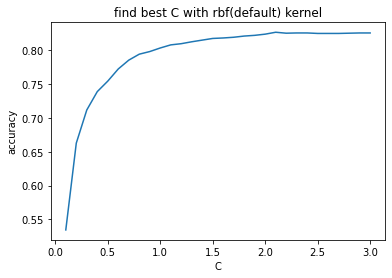

In [20]:
X2 = []
Y2 = []
M2 = []
best_acc_for_regularization = 0
best_C_for_regularization = 0
for C in range(1,31,1):
    accuracy = cross_val_score(SVC(C=C/10,decision_function_shape='ovr'),x_minmax_training,y_train,cv=5,scoring='accuracy').mean()
    if accuracy>best_acc_for_regularization:
        best_acc_for_regularization = accuracy
        best_C_for_regularization = C/10
    X2.append(C/10)
    Y2.append(accuracy)
    M2.append((C/10, accuracy))
print(M2)
plt.plot(X2,Y2)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('find best C with rbf(default) kernel')

print("best_C_for_regularization = %f" % best_C_for_regularization)
print("best_acc_for_regularization = %f" % best_acc_for_regularization)




params setting part2
###  params setting, find the best params for SVM with regularization term C linear kernel
###  using cross-validation(grid search method)
###  plot results with different params setting

[(0.01, 0.6316901408450704), (0.11, 0.7573943661971831), (0.21, 0.7630281690140845), (0.31, 0.7679577464788733), (0.41, 0.7672535211267606), (0.51, 0.7707746478873239), (0.61, 0.7735915492957746), (0.71, 0.7742957746478872), (0.81, 0.7714788732394366), (0.91, 0.769718309859155), (1.01, 0.7665492957746479), (1.11, 0.7672535211267606), (1.21, 0.7665492957746479), (1.31, 0.7669014084507042), (1.41, 0.7647887323943662), (1.51, 0.7640845070422534), (1.61, 0.7626760563380282), (1.71, 0.7598591549295775), (1.81, 0.7616197183098592), (1.91, 0.7598591549295775), (2.01, 0.7588028169014084), (2.11, 0.7588028169014085), (2.21, 0.7584507042253521), (2.31, 0.7588028169014084), (2.41, 0.7591549295774648), (2.51, 0.7566901408450705), (2.61, 0.7549295774647887), (2.71, 0.7549295774647888), (2.81, 0.7545774647887323), (2.91, 0.7552816901408451), (3.01, 0.7538732394366198), (3.11, 0.755281690140845), (3.21, 0.7559859154929578), (3.31, 0.7563380281690141), (3.41, 0.7552816901408451), (3.51, 0.754577464788

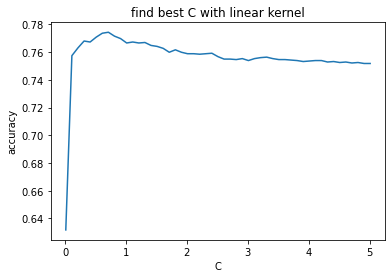

In [27]:
X1 = []
Y1 = []
M1 = []
best_acc_for_linear = 0
best_C_for_linear = 0
for C in range(1,510,10):
        accuracy = cross_val_score(SVC(C=C/100,kernel ='linear',decision_function_shape='ovr'),x_minmax_training,y_train,cv=5,scoring='accuracy').mean()
        if accuracy>best_acc_for_linear:
            best_acc_for_linear = accuracy
            best_C_for_linear = C/100
        X1.append(C/100)
        Y1.append(accuracy)
        M1.append((C/100, accuracy))
print(M1)
plt.plot(X1,Y1)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('find best C with linear kernel')
print("best_C_for_linear = %f" % best_C_for_linear)
print("best_acc_for_linear = %f" % best_acc_for_linear)




params setting part3
###  param setting, find the best params for SVM with regularization term C poly kernel
###  using cross-validation(grid search method)
###  plot results with different params setting

[(1, 0.7566901408450704), (2, 0.7566901408450704), (3, 0.7566901408450704), (4, 0.7566901408450704), (5, 0.7566901408450704), (6, 0.7566901408450704), (7, 0.7566901408450704), (8, 0.7566901408450704), (9, 0.7566901408450704)]
best_C_for_poly = 1.000000
best_acc_for_poly = 0.756690


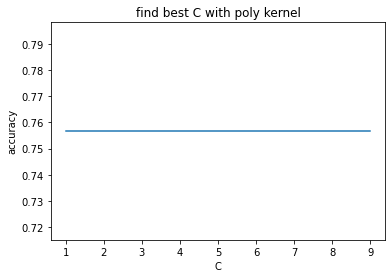

In [30]:
X4 = []
Y4 = []
M4 = []
best_acc_for_poly = 0
best_C_for_poly = 0
#for C in [0.0001,0.001,0.01,0.05,0.075,0.1,1,10,40,70,100]:
for C in range(1,30,1):
        accuracy = cross_val_score(SVC(C=C,kernel ='poly',decision_function_shape='ovr'),x_minmax_training,y_train,cv=5,scoring='accuracy').mean()
        if accuracy>best_acc_for_poly:
            best_acc_for_poly = accuracy
            best_C_for_poly = C
        X4.append(C)
        Y4.append(accuracy)
        M4.append((C, accuracy))
print(M4)
plt.plot(X4,Y4)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('find best C with poly kernel')
print("best_C_for_poly = %f" % best_C_for_poly)
print("best_acc_for_poly = %f" % best_acc_for_poly)




params setting part4
###  param setting, find the best params for SVM with regularization term C and gamma for RBF kernel
###  using cross-validation(grid search method)
###  plot results with different params setting

In [14]:
X = []
Y = []
Z = []
M = []
best_C_for_RBF = 0
best_gamma_for_RBF = 0
best_accuracy_for_RBF = 0
#for C in [0.01,0.1,1,10,100,1000,10000,100000,1000000,10000000]:
    #for gamma in [1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01,1,10,100,1000]:
for C in [0.01,0.1,1,10,100,1000]:
    for gamma in [1e-03,1e-02,1e-01,1,10]:
        accuracy = cross_val_score(SVC(C=C,gamma=gamma,kernel ='rbf',decision_function_shape='ovr'),x_minmax_training,y_train,cv=5,scoring='accuracy').mean()
        if best_accuracy_for_RBF<accuracy:
            best_C_for_RBF = C
            best_gamma_for_RBF = gamma
            best_accuracy_for_RBF = accuracy
        X.append(C)
        Y.append(gamma)
        Z.append(accuracy)
        M.append((C, gamma, accuracy))
print(M)
print("best_C_for_RBF = %f"%best_C_for_RBF)
print("best_gamma_for_RBF = %f"%best_gamma_for_RBF)
print("best_accuracy_for_RBF = %f"%best_accuracy_for_RBF)


[(0.01, 0.001, 0.11126760563380281), (0.01, 0.01, 0.11197183098591548), (0.01, 0.1, 0.12007042253521125), (0.01, 1, 0.1186619718309859), (0.01, 10, 0.11654929577464787), (0.1, 0.001, 0.11126760563380281), (0.1, 0.01, 0.43943661971830983), (0.1, 0.1, 0.4274647887323944), (0.1, 1, 0.1482394366197183), (0.1, 10, 0.11654929577464787), (1, 0.001, 0.4552816901408451), (1, 0.01, 0.6915492957746479), (1, 0.1, 0.8080985915492958), (1, 1, 0.6264084507042254), (1, 10, 0.454225352112676), (10, 0.001, 0.680281690140845), (10, 0.01, 0.7915492957746479), (10, 0.1, 0.8419014084507042), (10, 1, 0.6355633802816901), (10, 10, 0.4552816901408451), (100, 0.001, 0.7704225352112676), (100, 0.01, 0.7852112676056338), (100, 0.1, 0.840845070422535), (100, 1, 0.6355633802816901), (100, 10, 0.4552816901408451), (1000, 0.001, 0.7623239436619718), (1000, 0.01, 0.7806338028169015), (1000, 0.1, 0.840845070422535), (1000, 1, 0.6355633802816901), (1000, 10, 0.4552816901408451)]
best_C_for_RBF = 10.000000
best_gamma_for

# table below shows cross-validation results

In [15]:
from prettytable import PrettyTable
x= PrettyTable(["C", "gamma", "Accuracy"])
for i in M:
    x.add_row(i)
print(x)
f = open('1.txt','w')
f.write(str(x)+'\n')
f.close()

+------+-------+---------------------+
|  C   | gamma |       Accuracy      |
+------+-------+---------------------+
| 0.01 | 0.001 | 0.11126760563380281 |
| 0.01 |  0.01 | 0.11197183098591548 |
| 0.01 |  0.1  | 0.12007042253521125 |
| 0.01 |   1   |  0.1186619718309859 |
| 0.01 |   10  | 0.11654929577464787 |
| 0.1  | 0.001 | 0.11126760563380281 |
| 0.1  |  0.01 | 0.43943661971830983 |
| 0.1  |  0.1  |  0.4274647887323944 |
| 0.1  |   1   |  0.1482394366197183 |
| 0.1  |   10  | 0.11654929577464787 |
|  1   | 0.001 |  0.4552816901408451 |
|  1   |  0.01 |  0.6915492957746479 |
|  1   |  0.1  |  0.8080985915492958 |
|  1   |   1   |  0.6264084507042254 |
|  1   |   10  |  0.454225352112676  |
|  10  | 0.001 |  0.680281690140845  |
|  10  |  0.01 |  0.7915492957746479 |
|  10  |  0.1  |  0.8419014084507042 |
|  10  |   1   |  0.6355633802816901 |
|  10  |   10  |  0.4552816901408451 |
| 100  | 0.001 |  0.7704225352112676 |
| 100  |  0.01 |  0.7852112676056338 |
| 100  |  0.1  |  0.84084



functions to train 4 different SVM models above

In [26]:
# store running time and accuracy
training_time = []
testing_test_data_time = []
testing_train_data_time = []
accuracy_for_test_data = []
accuracy_for_train_data = []


#### SVM with regularization and default kernel(rbf) ########
def C_SVM(C):
    start = time.perf_counter()
    svm = SVC(C = C,decision_function_shape='ovr')
    svm.fit(x_minmax_training,y_train)
    end = time.perf_counter()
    training_time.append((end-start))
    print("time for training default SVM with regularization = %f" % (end-start))
    return svm


#### SVM with regularation and linear kernel ########
def linear_SVM(C):
    start = time.perf_counter()
    svm = SVC(C = C,kernel = 'linear',decision_function_shape='ovr')
    svm.fit(x_minmax_training,y_train)
    end = time.perf_counter()
    training_time.append((end-start))
    print("time for training linear SVM = %f" % (end-start))
    return svm

#### SVM with regularation and  rbf kernel ########
def RBF_SVM(C,gamma):
    start = time.perf_counter()
    svm = SVC(C = C,gamma = gamma,kernel = 'rbf',decision_function_shape='ovr')
    svm.fit(x_minmax_training,y_train)
    end = time.perf_counter()
    training_time.append((end-start))
    print("time for training RBF SVM = %f" % (end-start))
    return svm


def poly_SVM(C):
    start = time.perf_counter()
    svm = SVC(C = C,kernel = 'poly',decision_function_shape='ovr')
    svm.fit(x_minmax_training,y_train)
    end = time.perf_counter()
    training_time.append((end-start))
    print("time for training poly SVM = %f" % (end-start))
    return svm



testing function for 4 models
#test_model1 : testing testing data
#test_model1 : testing training data

In [27]:

def test_model1(svm,xtest,ytest):
    start = time.perf_counter()
    error = 0
    for i in range(len(xtest)):
        result = svm.predict([xtest[i]])
        if result != ytest[i]:
            error = error+1
    end = time.perf_counter()
    testing_test_data_time.append((end-start))
    accuracy_for_test_data.append((1-error/len(xtest)))
    print("time for testing testing data SVM = %f" % (end-start))
    print("accuracy = %f" % (1-error/len(xtest)))
    return (1-error/len(xtest))


def test_model2(svm,xtrain,ytrain):
    start = time.perf_counter()
    error = 0
    for i in range(len(xtrain)):
        result = svm.predict([xtrain[i]])
        if result != ytrain[i]:
            error = error+1
    end = time.perf_counter()
    testing_train_data_time.append((end-start))
    accuracy_for_train_data.append((1-error/len(xtrain)))
    print("time for testing training data SVM = %f" % (end-start))
    print("accuracy = %f" % (1-error/len(xtrain)))
    return (1-error/len(xtrain))




# train 4 models with the best params for minist web data,choose one to run according to dataset

In [28]:
best_C_for_linear_0 = 0.11
best_C_for_regularization_0 = 2
best_C_for_RBF_0 = 10
best_gamma_for_RBF_0 = 0.01
best_C_for_poly_0 = 6

linear_SVM = linear_SVM(best_C_for_linear_0)
C_SVM = C_SVM(best_C_for_regularization_0)
RBF_SVM = RBF_SVM(best_C_for_RBF_0,best_gamma_for_RBF_0)
poly_SVM = poly_SVM(best_C_for_poly_0)

time for training linear SVM = 2.623721
time for training default SVM with regularization = 2.062034
time for training RBF SVM = 1.713508
time for training poly SVM = 1.794266



# train 4 models with the best params for bb data,choose one to run according to dataset

In [18]:
best_C_for_linear_230 = 0.71
best_C_for_regularization_230 = 2.1
best_C_for_RBF_230 = 10
best_gamma_for_RBF_230 = 0.1
best_C_for_poly_230 = 1

linear_SVM = linear_SVM(best_C_for_linear_230)
C_SVM = C_SVM(best_C_for_regularization_230)
RBF_SVM = RBF_SVM(best_C_for_RBF_230,best_gamma_for_RBF_230)
poly_SVM = poly_SVM(best_C_for_poly_230)

time for training linear SVM = 3.910748
time for training default SVM with regularization = 5.696757
time for training RBF SVM = 7.096878
time for training poly SVM = 2.959384



run the test

In [29]:
# test 4 models with the best params using testing data
ac2 = test_model1(linear_SVM,x_minmax_testing,y_test)
ac3 = test_model1(C_SVM,x_minmax_testing,y_test)
ac4 = test_model1(RBF_SVM,x_minmax_testing,y_test)
ac5 = test_model1(poly_SVM,x_minmax_testing,y_test)

# test 4 models with the best params using training data
ac6 = test_model2(linear_SVM,x_minmax_training,y_train)
ac7 = test_model2(C_SVM,x_minmax_training,y_train)
ac8 = test_model2(RBF_SVM,x_minmax_training,y_train)
ac9 = test_model2(poly_SVM,x_minmax_training,y_train)

time for testing testing data SVM = 1.766975
accuracy = 0.892222
time for testing testing data SVM = 2.488325
accuracy = 0.931111
time for testing testing data SVM = 2.161975
accuracy = 0.932222
time for testing testing data SVM = 0.771524
accuracy = 0.915556
time for testing training data SVM = 3.080689
accuracy = 0.990141
time for testing training data SVM = 7.166654
accuracy = 0.995423
time for testing training data SVM = 7.346545
accuracy = 1.000000
time for testing training data SVM = 2.780752
accuracy = 0.998944




print out SVM classifiers performances

In [30]:
ghp_label = ['linear_SVM','C_SVM','RBF_SVM','poly_SVM']
tab = ["SVM classifiers","training time(s)","testing training-set time(s)","training accuracy","testing testing-set time(s)","testing accuracy"]

M = []
for i in range(4):
    M.append([ghp_label[i],format(training_time[i], '.10f'),format(testing_train_data_time[i], '.10f'),format(accuracy_for_train_data[i], '.10f'),format(testing_test_data_time[i], '.10f'),format(accuracy_for_test_data[i], '.10f')])
from prettytable import PrettyTable
x= PrettyTable(tab)
for i in M:
    x.add_row(i)
print(x)

f = open('SVM performance.txt','w')
f.write(str(x)+'\n')
f.close()

+-----------------+------------------+------------------------------+-------------------+-----------------------------+------------------+
| SVM classifiers | training time(s) | testing training-set time(s) | training accuracy | testing testing-set time(s) | testing accuracy |
+-----------------+------------------+------------------------------+-------------------+-----------------------------+------------------+
|    linear_SVM   |   2.6237208000   |         3.0806893000         |    0.9901408451   |         1.7669749000        |   0.8922222222   |
|      C_SVM      |   2.0620339000   |         7.1666539000         |    0.9954225352   |         2.4883246000        |   0.9311111111   |
|     RBF_SVM     |   1.7135082000   |         7.3465446000         |    1.0000000000   |         2.1619754000        |   0.9322222222   |
|     poly_SVM    |   1.7942665000   |         2.7807525000         |    0.9989436620   |         0.7715244000        |   0.9155555556   |
+-----------------+--------